# Programming Assignment 1

## Линейная алгебра: сходство текстов и аппроксимация функций

In [12]:
import numpy as np
import pandas as pd
import pandas as pd
import scipy
from scipy.spatial.distance import cosine
import re

### Задача 1: сравнение предложений

In [91]:
with open("data/sentences.txt") as text:
    text = text.read().lower()
    sentences = text.split("\n")[:-1]
    
    token = set(re.split('[^a-z]', text))
    token = [x for x in token if x]

Функция для подсчета вхождений

In [92]:
def count_w(sent, word):
    occ = 0
    sent = re.split('[^a-z]', sent)
    for i in sent:
        if i == word:
            occ += 1
    return occ

In [93]:
indexes = list(range(len(token)))
tuples = list(zip(token, indexes))

In [94]:
index_tokens = {y:x for x,y in tuples}

In [95]:
array = np.zeros((22,254))

In [96]:
for i, sen in enumerate(sentences):
#   цикл по  i-му предложению
    for j, w in index_tokens.items():
#         цикл по j-му слову в списке
        array[i, j] = count_w(sen, w)

In [97]:
array.shape

(22, 254)

In [98]:
dists = []
for row in array[1:, :]:
    dist = cosine(array[0,:] , row)
    dists.append(dist)

In [102]:
sorted(dists)

[0.7327387580875756,
 0.77708871496985887,
 0.82503644694405875,
 0.83281653622739416,
 0.83964325485254543,
 0.84063618542208085,
 0.84275727449171223,
 0.86447381456421235,
 0.87035925528956715,
 0.87401184233025764,
 0.88047713906656067,
 0.88427248752843113,
 0.88854435748492944,
 0.89517151632780823,
 0.90550888174769317,
 0.92587506833388988,
 0.94023856953328033,
 0.94427217874246472,
 0.94427217874246472,
 0.95275444087384664,
 0.95664450152379399]

1 и 17 ? 

In [103]:
max1,max2 = 0.7327387580875756, 0.77708871496985887

In [104]:
max_all = []
for i in range(len(dists)):
    if dists[i] == max1 or dists[i] == max2:
        print(i + 1)
        max_all.append(i + 1)

4
6


Ответ: 1 и 17 предложение ближе всего по косинусному растоянию к первому предложению

In [107]:
with open("data/subm1.txt", "w") as subm:
    subm.write(" ".join(str(i) for i in max_all))

In [109]:
!cat data/subm1.txt

4 6

### Задача 2: аппроксимация функции

In [32]:
from matplotlib import pylab as plt
from scipy import linalg

In [4]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

График фукнции f(x) на отрезке [1,15]

In [17]:
x_dots = list(range(1, 16))
y_dots = [f(x) for x in x_dots]

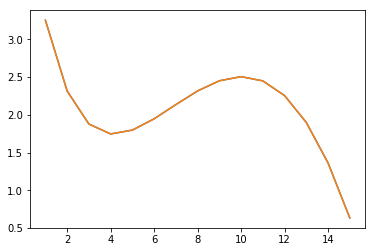

In [19]:
plt.plot(x_dots, y_dots)
plt.show()

Многочлен первой степени для 2 точек - 1 и 15

Добавляю колонку из 1 для первого w0 коэффициента

In [43]:
a = np.array([[1, 1], [1, 15]])
b = np.array([f(1), f(15)])

In [44]:
w = linalg.solve(a, b)

In [45]:
w

array([ 3.43914511, -0.18692825])

In [61]:
def approx(x, w):
    return w[0] + w[1] * x

In [62]:
y_aporx_dots = [approx(x, w) for x in x_dots]

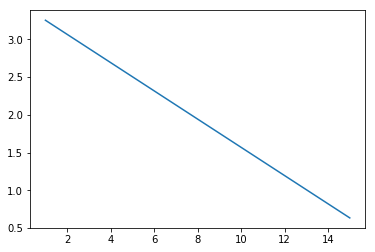

In [63]:
plt.plot(x_dots, y_aporx_dots)
plt.show()

Многочлен третьей степени для 4 точек - 1, 4, 10 и 15

In [79]:
a = np.array([[1,1,1,1], [1,4,4**2, 4**3], [1,10,10**2, 10**3], [1, 15, 15**2,15**3]])
b = np.array([f(1), f(4), f(10), f(15)])

In [84]:
a, b

(array([[   1,    1,    1,    1],
        [   1,    4,   16,   64],
        [   1,   10,  100, 1000],
        [   1,   15,  225, 3375]]),
 array([ 3.25221687,  1.74684595,  2.50541641,  0.63522142]))

In [80]:
w = linalg.solve(a, b)

In [81]:
def approx(x, w):
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3

In [82]:
y_aporx_dots = [approx(x, w) for x in x_dots]

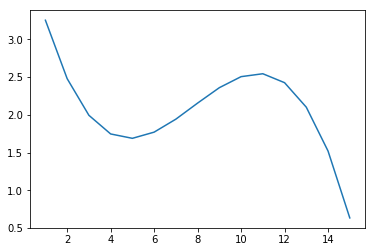

In [83]:
plt.plot(x_dots, y_aporx_dots)
plt.show()

In [88]:
with open("subm2.txt", "w") as subm:
    subm.write(" ".join(str(i) for i in w))

In [90]:
!cat data/subm2.txt

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332